In [1]:
%matplotlib inline
import pylab as pl
import numpy as np 

# Información mutua

La información mutua se basa en el concepto de entropía, el cual se asocia con la **aleatoriedad** de un evento.
En términos más coloquiales:

> La entropía depende de la probabilidad $P(X=1)$ de que $X$ tome el valor $1$. Cuando $P(X=1)=0.5$, todos los resultados posibles son igualmente probables, por lo que el resultado es poco predecible y la entropía es máxima.

Claude E. Shanon definió la entropía como:

$H(X) = \sum_{x} f(x) log_{2} f(x)$

Donde $X$ es una variable aleatoria que se distribuye según $f(x)$.

In [5]:
x1 = np.random.uniform(-3,3,100)
x2 = np.random.normal(0,1,100)

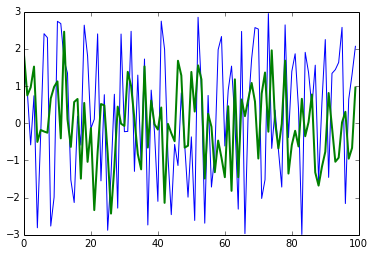

In [7]:
pl.plot(x1)
pl.plot(x2,lw = 2)

___
## Definición de la Información mutua.

Entre dos variables definió la entropía como:

$H(X,Y) = \sum_{x,y} p(x,y) log_{2} p(x,y)$

Si $X$ y $Y$ son sistemas independientes:

>- La entropía de todo el sistema será: $H(X)+H(Y)$.

Pero en todos los casos:

>- $H(X) \le H(X,Y)$.
>- $H(X) = H(X,Y)$ se dará solo cuando $X$ es totalmente dependiente de $Y$.


Teniendo en cuenta lo anterior, se puede definir la información mutua como:

> la suma de la entropía de ambos sistemas menos la entropía conjunta de ambos, de esta forma:
$I(X,Y) = H(X) + H(Y) - H(X,Y)$

Remplazando las ecuaciones anteriores en las definiciones de entropía se obtiene la ecuación final para la información mutua:

> $I(X,Y) = \sum_{x,y} p(x,y) log_{2} \frac{p(x,y)}{f(x)g(y)}$

Es importante tener en cuenta que:
- $p(x,y)$ es la probabilidad conjunta de $x$ y $y$.
- $f(x)g(y)$ es la probabilidad asumiendo independencia.

In [92]:
def mutual_information(X,Y,bins=15):
    pxy,b1,b2=np.histogram2d(X,Y,bins=bins)
    fx=np.histogram(X,bins=bins)[0]; fx=fx.astype(float)
    gy=np.histogram(Y,bins=bins)[0]; gy=gy.astype(float)
    pxy=pxy/pxy.sum(); fx=fx/fx.sum()
    gy=gy/gy.sum()
    val=0
    for posX,i in enumerate(fx):
        for posY,j in enumerate(gy):
            if pxy[posX,posY]/(i*j) > 0:
                v=pxy[posX,posY]*np.log2(pxy[posX,posY]/(i*j))
                val+=v
    return val

### Ecuación para obtener la Entropía

A continuación se presenta el código que puede ser usado para obtener la entropía de una variable $X$

In [37]:
def entropy(X,bins=15):
    fx=np.histogram(X,bins=bins)[0]; fx=fx.astype(float)
    fx=fx/fx.sum()
    val = 0
    for i in fx:
        if i>0:
            val += np.abs(i * np.log2(i))
    return val

In [112]:
def entropy2d(X,Y,bins = 15):
    pxy,b1,b2=np.histogram2d(X,Y,bins=bins)
    pxy=pxy/pxy.sum()
    val=0
    for posX in range(bins):
        for posY in range(bins):
            if pxy[posX,posY] > 0:
                v=pxy[posX,posY]*np.log2(pxy[posX,posY])
                val+=np.abs(v)
    return val

___
### Ejemplo de aplicación:

>- $X$ se distribuye normal entre $0$ y $1$.
>- $Y = (BX+CZ)/K$ donde $B$ y $C$ son constantes y $Z \sim N(0,1)$, y $K=\sqrt{B^2 + C^2}$.

A tener en cuenta:

>- Si $B=0$ y $C=1$, $X$ y $Y$ van a ser totalmente independientes.
>- Si $B \ne 0$ y $C=0$, $X$ y $Y$ serán totalmente dependientes.

Derfinimos una función para obtener a $Y$ en función de $X$ y de las contantes mencionadas:

In [23]:
def YfromX(x,B=0.0,C=1.0):
    K = np.sqrt(B**2.0 + C**2.0)
    Z = np.random.normal(0,1,len(x))
    return (B*x + C*Z)/K

Calculamos la entropía de cada variable por separado.

>- Para $X \sim N(0,1)$ y con 500.000 intervalos generados se tiene: 

In [24]:
X = np.random.normal(0,1,int(5e5))
print 'Entropia X:' ,entropy(X,bins=30)
print 'Entropia Y:' ,entropy(YfromX(X),bins = 30)

Entropia X: 3.73310458955
Entropia Y: 3.68835307385


De acuerdo a este resultado y teniendo 30 intervalos de clase se tiene que:

> La entropía varía desde:
>- 0: Independencia total entre las variables.
>- 3.7: Dependencia total.

### Continuación ...

Si se fijan bien, $Y$ depende de dos variables aleatorias $X$ y $Z$, 
independiente de quien ella dependa, su entropía se mantiene alrededor del mismo valor:

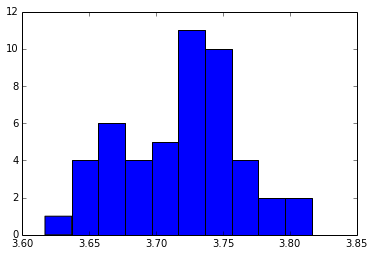

In [39]:
E = list()
for i in np.linspace(0,1,50):
    E.append(entropy(YfromX(X,B=i,C=1-i),bins = 30))    
a = pl.hist(E[1:])

### Variación de $p(x,y)$:

Veamos que pasa en los casos extremos:
>- $B=0$ y $C=0.5$.
>- $B=0.5$ y $C=0.5$.

In [106]:
Y1 = YfromX(X,B=0,C=0.5)
Y2 = YfromX(X,B=0.5,C=0.5)

def PlotHistograms2D(x,y1,y2,bins = 30):
    fig = pl.figure(figsize=(10,8))
    ax = fig.add_subplot(121)
    pxy,b1,b2=np.histogram2d(X,Y1,bins=bins)
    pxy[pxy == 0] = np.nan
    pl.imshow(pxy[::-1],interpolation='None',
        cmap=pl.get_cmap('terrain'))
    ax = fig.add_subplot(122)
    pxy,b1,b2=np.histogram2d(X,Y2,bins=bins)
    pxy[pxy == 0] = np.nan
    pl.imshow(pxy[::-1],interpolation='None',
        cmap=pl.get_cmap('terrain'))

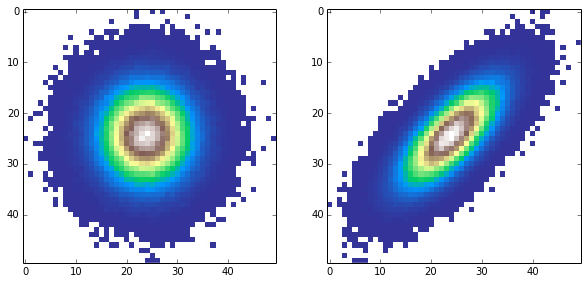

In [107]:
PlotHistograms2D(X,Y1,Y2,bins = 50)

In [101]:
def PlotInfoMutua(I,x):
    fig = pl.figure(figsize=(5,3))
    ax = fig.add_subplot(111)
    ax.plot(x,I,lw=2)
    ax.set_xlabel('C',size=14)
    ax.set_ylabel('$I(x,y)$',size=14)
    ax.grid(True)

### Variación de la información mutua:

Si el valor de $C$ se mantiene constante y $B$ varía desde $0$ hasta $1$ se debe apreciar la variación de la información mutua entre $X$ y $Y$, esta debería oscilar entre $0$ y $3.7$.

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:10: RuntimeWarning: invalid value encountered in double_scalars


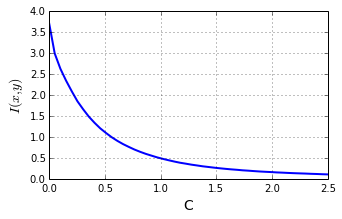

In [103]:
I = []
for i in np.linspace(0,2.5,50):
    Y = YfromX(X,B = 1, C = i)
    I.append(mutual_information(X,Y,bins = 30))
PlotInfoMutua(I,np.linspace(0,2.5,50))

## Mirando si se puede aplicar la definición:

Veamos si se puede obtener la información mutua directamente de la entropia entre dos variables



In [120]:
Y = YfromX(X,B=1,C=0)
entropy(X,bins=30)+entropy(Y,bins=30)-entropy2d(X,Y,bins=30)

3.7331045895539092

___
## Tarea 2:

Reproduzca lo visto acá en clase y genere las siguientes figuras:

>- Histogramas $f(x)$ y $g(y)$ para las variables analizadas.
>- Histogramas conjuntos para $B = 0, 0.2, 0.6, 1$ tomando $C=0.3$.
>- Genere la gráfica de variación de la información mutua vista en clase.

Preguntas:

>- El valor de información mutua varía de acuerdo a la cantidad de intervalos?.
>- En el caso de la gráfica de información mutua, existen otros valores de $B$, además del ya seleccionado, en los cuales $I(x,y)$ sea máxima.